# 0. Load imports 

In [1]:
## imports
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## load data on 2020 crimes in DC
df = dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")

# 1. Questions: list comprehension

- In class example, why did we need the "courses" at the beginning of the list iteration
- How did the join syntax work in the example where we paste together offenses from same ward

In [3]:
## toy example

### pool of courses
all_courses = ["QSS20", "QSS17", "GOV10", "GOV4", "CSC1"]


## 1.1 Application 1: filtering to a smaller list

When we might use: have a lot of columns in a dataframe; want to filter to a smaller set using some pattern

In [5]:
### pull out ones that contain GOV in the string
gov_c = [course for course in all_courses if "GOV" in course]
gov_c # result

['GOV10', 'GOV4']

In [7]:
### showing that the "course" is just a placeholder/
### arbitrary interator
gov_c_alt = [x for x in all_courses if "GOV" in x]

gov_c == gov_c_alt

True

## 1.2 Application two: keep all objects in the list but do some transformation

In [9]:
all_courses

## strip the numbers from the course names
courses_prefix = [x[:3] for x in all_courses]
courses_prefix # could then find unique elements


['QSS20', 'QSS17', 'GOV10', 'GOV4', 'CSC1']

['QSS', 'QSS', 'GOV', 'GOV', 'CSC']

In [11]:
# Join all together example
" #:(# ".join(courses_prefix)

'QSS #:(# QSS #:(# GOV #:(# GOV #:(# CSC'

#### Your turn: Using original list, add "dartmouth_" prefix to the course name

In [23]:
dartmouth_courses = ["dartmouth_" + x for x in all_courses]
dartmouth_courses

['dartmouth_QSS20',
 'dartmouth_QSS17',
 'dartmouth_GOV10',
 'dartmouth_GOV4',
 'dartmouth_CSC1']

## 1.3 Subsetting columns

Use list comprehension to filter to columns with id in the string. Then, create a new dataframe called df1 that contains only column heads with "id"

In [31]:
id_cols = [col for col in df.columns if "ID" in col]
id_cols

## Then, filter the data
df1 = df[id_cols]
print(df1)

['BID', 'OBJECTID', 'OCTO_RECORD_ID']

                BID   OBJECTID  OCTO_RECORD_ID
0               NaN  673713315             NaN
1               NaN  673713316             NaN
2               NaN  673713317             NaN
3               NaN  673713318             NaN
4               NaN  673713319             NaN
...             ...        ...             ...
27926           NaN  674255559             NaN
27927  CAPITOL HILL  674255577             NaN
27928           NaN  674255586             NaN
27929           NaN  674255588             NaN
27930           NaN  674255589             NaN

[27931 rows x 3 columns]


## 1.4 Comprehension for numbers

Here we compare two ways of creating a list of even numbers.

In [41]:
num_list = np.arange(10000)
num_list

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [43]:
%%time
even_nums = [i for i in num_list if (i % 2) == 0]

CPU times: user 3.25 ms, sys: 46 μs, total: 3.3 ms
Wall time: 3.31 ms


In [45]:
%%time
num_list[~(num_list % 2).astype(bool)]

CPU times: user 521 μs, sys: 321 μs, total: 842 μs
Wall time: 529 μs


array([   0,    2,    4, ..., 9994, 9996, 9998])

In [47]:
num_list[ ~(num_list % 2).astype(bool) ]

array([   0,    2,    4, ..., 9994, 9996, 9998])

#### Your turn: Extract all numbers in num_list that end in 7

In [51]:
mod_7 = [i for i in num_list if (i % 10) ==7]
mod_7

[7,
 17,
 27,
 37,
 47,
 57,
 67,
 77,
 87,
 97,
 107,
 117,
 127,
 137,
 147,
 157,
 167,
 177,
 187,
 197,
 207,
 217,
 227,
 237,
 247,
 257,
 267,
 277,
 287,
 297,
 307,
 317,
 327,
 337,
 347,
 357,
 367,
 377,
 387,
 397,
 407,
 417,
 427,
 437,
 447,
 457,
 467,
 477,
 487,
 497,
 507,
 517,
 527,
 537,
 547,
 557,
 567,
 577,
 587,
 597,
 607,
 617,
 627,
 637,
 647,
 657,
 667,
 677,
 687,
 697,
 707,
 717,
 727,
 737,
 747,
 757,
 767,
 777,
 787,
 797,
 807,
 817,
 827,
 837,
 847,
 857,
 867,
 877,
 887,
 897,
 907,
 917,
 927,
 937,
 947,
 957,
 967,
 977,
 987,
 997,
 1007,
 1017,
 1027,
 1037,
 1047,
 1057,
 1067,
 1077,
 1087,
 1097,
 1107,
 1117,
 1127,
 1137,
 1147,
 1157,
 1167,
 1177,
 1187,
 1197,
 1207,
 1217,
 1227,
 1237,
 1247,
 1257,
 1267,
 1277,
 1287,
 1297,
 1307,
 1317,
 1327,
 1337,
 1347,
 1357,
 1367,
 1377,
 1387,
 1397,
 1407,
 1417,
 1427,
 1437,
 1447,
 1457,
 1467,
 1477,
 1487,
 1497,
 1507,
 1517,
 1527,
 1537,
 1547,
 1557,
 1567,
 1577,
 1587

#### Your turn: Divide each number  in num_list by 2

In [53]:
num_list_div_2 = [i/2 for i in num_list ]
num_list_div_2

[0.0,
 0.5,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 12.0,
 12.5,
 13.0,
 13.5,
 14.0,
 14.5,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0,
 18.5,
 19.0,
 19.5,
 20.0,
 20.5,
 21.0,
 21.5,
 22.0,
 22.5,
 23.0,
 23.5,
 24.0,
 24.5,
 25.0,
 25.5,
 26.0,
 26.5,
 27.0,
 27.5,
 28.0,
 28.5,
 29.0,
 29.5,
 30.0,
 30.5,
 31.0,
 31.5,
 32.0,
 32.5,
 33.0,
 33.5,
 34.0,
 34.5,
 35.0,
 35.5,
 36.0,
 36.5,
 37.0,
 37.5,
 38.0,
 38.5,
 39.0,
 39.5,
 40.0,
 40.5,
 41.0,
 41.5,
 42.0,
 42.5,
 43.0,
 43.5,
 44.0,
 44.5,
 45.0,
 45.5,
 46.0,
 46.5,
 47.0,
 47.5,
 48.0,
 48.5,
 49.0,
 49.5,
 50.0,
 50.5,
 51.0,
 51.5,
 52.0,
 52.5,
 53.0,
 53.5,
 54.0,
 54.5,
 55.0,
 55.5,
 56.0,
 56.5,
 57.0,
 57.5,
 58.0,
 58.5,
 59.0,
 59.5,
 60.0,
 60.5,
 61.0,
 61.5,
 62.0,
 62.5,
 63.0,
 63.5,
 64.0,
 64.5,
 65.0,
 65.5,
 66.0,
 66.5,
 67.0,
 67.5,
 68.0,
 68.5,
 69.0,
 69.5,
 70.0,
 70.5,
 71.0,
 71.5,
 72.0,
 72.5

# 2. Questions: lambda functions

Two questions:

- General syntax (see here for a reference: https://www.w3schools.com/python/python_lambda.asp 
- How they work in the context of aggregations

How is a lambda function different from a "normal" user-defined function (that has the syntax def func_name(arg): etc?

- Operates similarly to normal user-defined functions in that it can take any # of arguments
- Operates differently in that it's an "anonymous" function or a function that we don't explicitly name/save in memory

## 2.1 General syntax for lambda functions

In [55]:
### two pools of courses
socsci = ["QSS20", "QSS17", "GOV10"]
natsci = ["BIO2", "PHYS3"]


## generalize some of the steps
## above into a two-arg function
## that takes the course prefix
## and a list of all courses
def filter_courses(prefix, all_courses):
    rel_courses = [c for c in all_courses if prefix in c]
    return(rel_courses)

### a few applications 
filter_courses(prefix = "QSS", all_courses = socsci)
filter_courses(prefix = "QSS", all_courses = natsci)
filter_courses(prefix = "BIO", all_courses = natsci)

['QSS20', 'QSS17']

[]

['BIO2']

In [57]:
## what's the lambda function version of this
filter_courses_v2 = lambda prefix, all_courses: [c for c in all_courses if prefix in c]
filter_courses_v2(prefix = "BIO", all_courses = natsci)


['BIO2']

## 2.2 using alongside agg

In [ ]:
## use lambda to find modal block in a ward- multiple ways

### way 1: subsetting agg syntex
df.groupby("WARD")["BLOCK"].agg(lambda x: x.mode())

### way 2: dictionary agg syntax
df.groupby("WARD").agg({"BLOCK": lambda x: x.mode()})


#### Your turn: Group by WARD and get the mean and standard deviation (std) of X and Y

In [65]:
std = lambda x: x.std()
mean = lambda x: x.mean() 

df.groupby("WARD").agg({"X": [std,mean], "Y": [std,mean]})

X                     Y           
     <lambda_0> <lambda_1> <lambda_0> <lambda_1>
WARD                                            
1      0.007200 -77.031256   0.006417  38.924716
2      0.014106 -77.038959   0.005360  38.905941
3      0.013408 -77.075320   0.013887  38.941557
4      0.011813 -77.024905   0.013923  38.957674
5      0.014957 -76.989451   0.012766  38.920249
6      0.011302 -77.001175   0.010021  38.893112
7      0.018753 -76.947402   0.012504  38.888669
8      0.012791 -76.988986   0.015775  38.850526

### Random sampling and distance measures

In [67]:
random_uniform = np.random.rand(5)  # 5 random numbers between 0 and 1
print("Random numbers from uniform distribution:", random_uniform)

random_normal = np.random.randn(5)  # 5 random numbers from a standard normal distribution
print("Random numbers from normal distribution:", random_normal)

Random numbers from uniform distribution: [0.45682828 0.78316313 0.00517485 0.18407782 0.17333632]
Random numbers from normal distribution: [-0.31820289  0.59769361 -0.06061398 -1.75181863  0.41021066]


<Axes: ylabel='Density'>

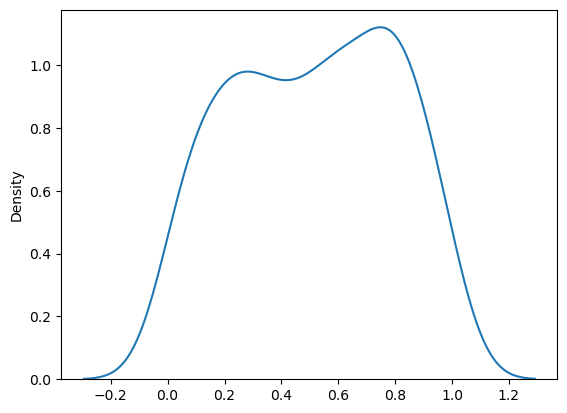

In [69]:
N = 200

sns.kdeplot(np.random.rand(N))

<Axes: ylabel='Density'>

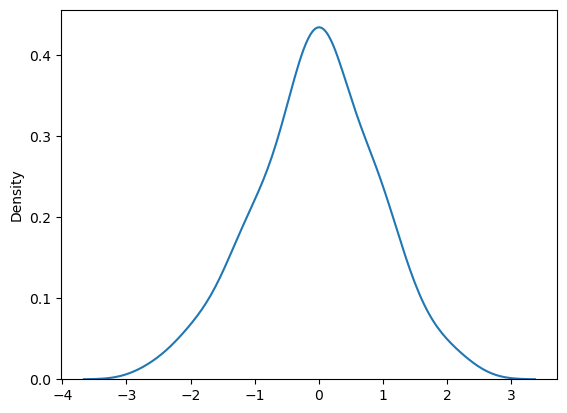

In [71]:
sns.kdeplot(np.random.randn(N))

Your turn: This last portion will consist of computing distances between points.
1. Create a dataframe with four columns (name them X1, Y1, X2, Y2), using np.random.randn(). Each should have a different mean.
2. Create a new column called Manhattan and Euclidean, and compute the distance using apply.
3. Plot the distribution of the two. What do you notice?

In [111]:
%%time

df = pd.DataFrame({ "X1": np.random.randn(10000), "Y1": np.random.randn(10000), "X2": np.random.randn(10000), "Y2": np.random.randn(10000)})
df["EUCLIDEAN"] = np.sqrt((df["X2"]-df["X1"])**2 + (df["Y2"]-df["Y1"])**2)
df["MANHATTAN"] = (df["X2"]-df["X1"]+df["Y2"]-df["Y1"])
df.head()

CPU times: user 4.39 ms, sys: 1.73 ms, total: 6.13 ms
Wall time: 4.07 ms


,X1,Y1,X2,Y2,EUCLIDEAN,MANHATTAN
0,-1.426403,0.185652,-0.740749,1.570506,1.545297,2.070509
1,0.708366,-0.605718,-0.697915,1.075422,2.191771,0.274859
2,-0.076236,0.004861,0.590900,1.200372,1.369057,1.862647
3,-0.678462,1.521988,-2.327530,-0.380235,2.517514,-3.551291
4,0.228377,0.120024,-0.430978,-1.006868,1.305617,-1.786248


<Figure size 1200x500 with 0 Axes>

<Axes: >

(array([128., 312., 466., 621., 761., 810., 929., 863., 822., 774., 699.,
        587., 495., 426., 322., 272., 211., 179., 105.,  81.,  49.,  31.,
         21.,  13.,  13.,   4.,   3.,   2.,   0.,   1.]),
 array([0.01732256, 0.21981876, 0.42231496, 0.62481116, 0.82730737,
        1.02980357, 1.23229977, 1.43479597, 1.63729218, 1.83978838,
        2.04228458, 2.24478078, 2.44727699, 2.64977319, 2.85226939,
        3.05476559, 3.2572618 , 3.459758  , 3.6622542 , 3.8647504 ,
        4.06724661, 4.26974281, 4.47223901, 4.67473521, 4.87723142,
        5.07972762, 5.28222382, 5.48472002, 5.68721623, 5.88971243,
        6.09220863]),
 <BarContainer object of 30 artists>)

<Axes: >

(array([  5.,   5.,  17.,  35.,  70., 124., 144., 247., 347., 464., 656.,
        797., 856., 925., 938., 928., 802., 701., 573., 469., 339., 224.,
        153.,  76.,  52.,  21.,  16.,  10.,   3.,   3.]),
 array([-6.81645438, -6.3418816 , -5.86730882, -5.39273605, -4.91816327,
        -4.44359049, -3.96901772, -3.49444494, -3.01987216, -2.54529939,
        -2.07072661, -1.59615383, -1.12158106, -0.64700828, -0.1724355 ,
         0.30213727,  0.77671005,  1.25128283,  1.7258556 ,  2.20042838,
         2.67500116,  3.14957393,  3.62414671,  4.09871949,  4.57329226,
         5.04786504,  5.52243782,  5.99701059,  6.47158337,  6.94615615,
         7.42072892]),
 <BarContainer object of 30 artists>)

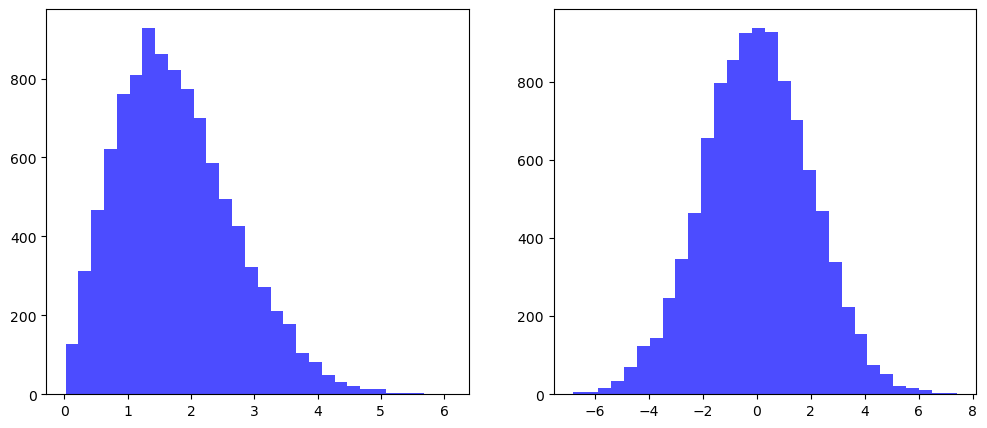

In [109]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df["EUCLIDEAN"], bins=30, alpha=0.7, color='blue')
         
plt.subplot(1, 2, 2)
plt.hist(df["MANHATTAN"], bins=30, alpha=0.7, color='blue')

plt.show()